Data Exploration

In [1]:
import os
folder_path = 'TomatoDiseaseClassification/TomatoDiseaseCleaned'
total_images = 0
total_classes = 0

for root, dirs, files in os.walk(folder_path):
    if root == folder_path:
        total_classes = len(dirs)
    else:
        total_images += len(files)

print(f"Total classes: {total_classes}")
print(f"Total images: {total_images}")

Total classes: 10
Total images: 16012


In [2]:
import os
import pandas as pd

class_counts = {}

for root, dirs, files in os.walk(folder_path):
    if root == folder_path:
        total_classes = len(dirs)
        class_names = dirs
        class_counts = {class_name: 0 for class_name in class_names}
    else:
        class_name = os.path.basename(root)
        num_files = len(files)
        class_counts[class_name] = num_files
        total_images += num_files

# Convert the class counts dictionary to a pandas DataFrame
df_class_counts = pd.DataFrame(list(class_counts.items()), columns=['Class Name', 'No of Files'])

# Print the DataFrame as a formatted table
print(df_class_counts.to_string(index=False))


                                 Class Name  No of Files
                      Tomato_Bacterial_spot         2127
                        Tomato_Early_blight         1000
                             Tomato_healthy         1591
                         Tomato_Late_blight         1909
                           Tomato_Leaf_Mold          952
                  Tomato_Septoria_leaf_spot         1771
Tomato_Spider_mites_Two_spotted_spider_mite         1676
                        Tomato__Target_Spot         1404
                Tomato__Tomato_mosaic_virus          373
      Tomato__Tomato_YellowLeaf__Curl_Virus         3209


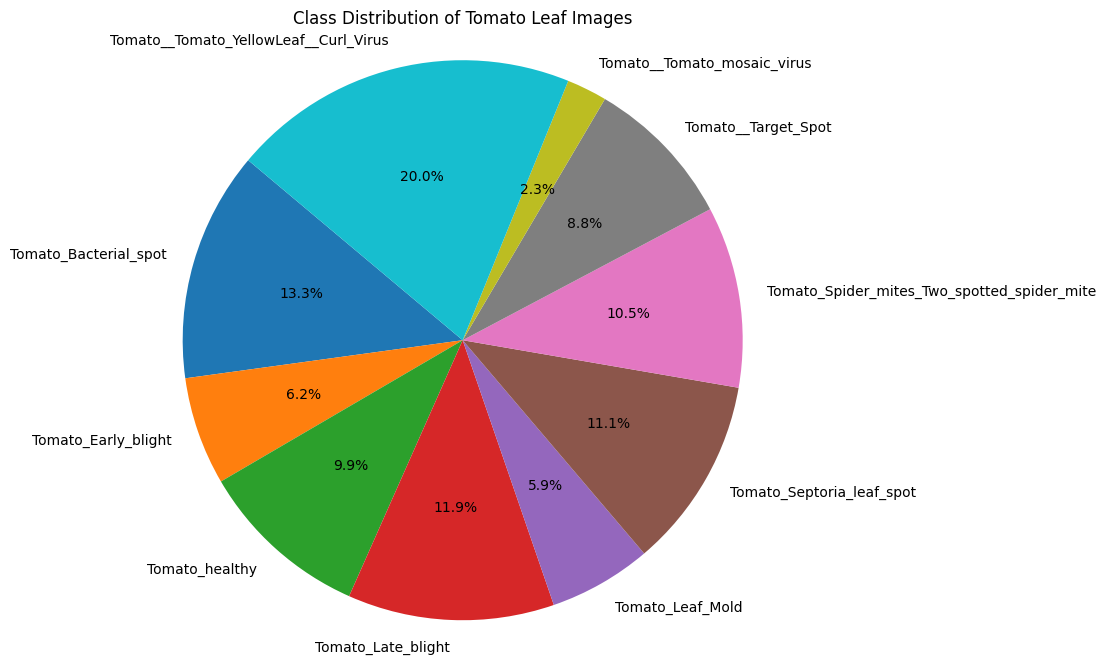

In [3]:
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt 

# Plot a pie chart of the class distribution
plt.figure(figsize=(10, 8))
plt.pie(df_class_counts['No of Files'], labels=df_class_counts['Class Name'], autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution of Tomato Leaf Images')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [4]:
import os
from collections import defaultdict
from PIL import Image

def count_image_sizes(directory):
    size_count = defaultdict(int) 
    for root, dirs, files in os.walk(directory):
        for filename in files:
            ext = os.path.splitext(filename)[1].lower()
            if ext in ['.jpg', '.jpeg']:  
                filepath = os.path.join(root, filename)
                with Image.open(filepath) as img:
                    size = img.size
                    size_count[size] += 1
    return size_count

image_sizes = count_image_sizes(folder_path)
for size, count in image_sizes.items():
    print(f"Size: {size[0]}x{size[1]}px")

Size: 256x256px


In [5]:
import os

def count_image_types(directory):
    image_types = {}
    for root, dirs, files in os.walk(directory):
        for filename in files:
            ext = os.path.splitext(filename)[1].lower()
            if ext in ['.jpg', '.jpeg', '.png', '.gif']:
                if ext in image_types:
                    image_types[ext] += 1
                else:
                    image_types[ext] = 1
    return image_types

image_types = count_image_types(folder_path)

if image_types:
    for ext, count in image_types.items():
        print(f"There are {count} images with the {ext} extension.")
else:
    print("No recognized image files found.")

There are 16010 images with the .jpg extension.
There are 1 images with the .jpeg extension.


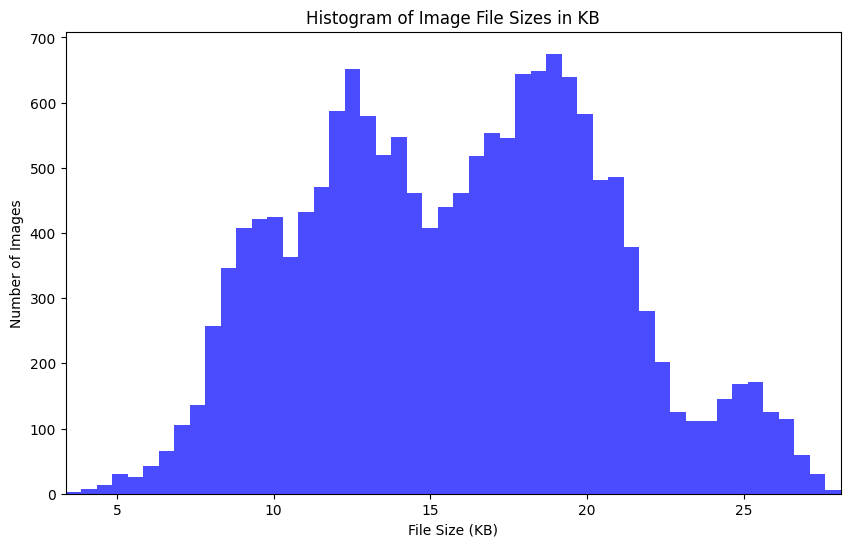

In [6]:
import os
import matplotlib.pyplot as plt

def get_image_file_sizes(directory):
    file_sizes = []
    for root, dirs, files in os.walk(directory):
        for filename in files:
            ext = os.path.splitext(filename)[1].lower()
            if ext in ['.jpg', '.jpeg']:
                filepath = os.path.join(root, filename)
                file_size_kb = os.path.getsize(filepath) / 1024 
                file_sizes.append(file_size_kb)

    return file_sizes

file_sizes = get_image_file_sizes(folder_path)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(file_sizes, bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Image File Sizes in KB')
plt.xlabel('File Size (KB)')
plt.ylabel('Number of Images')
plt.xlim([min(file_sizes), max(file_sizes)])  
plt.grid(False) 
plt.show()

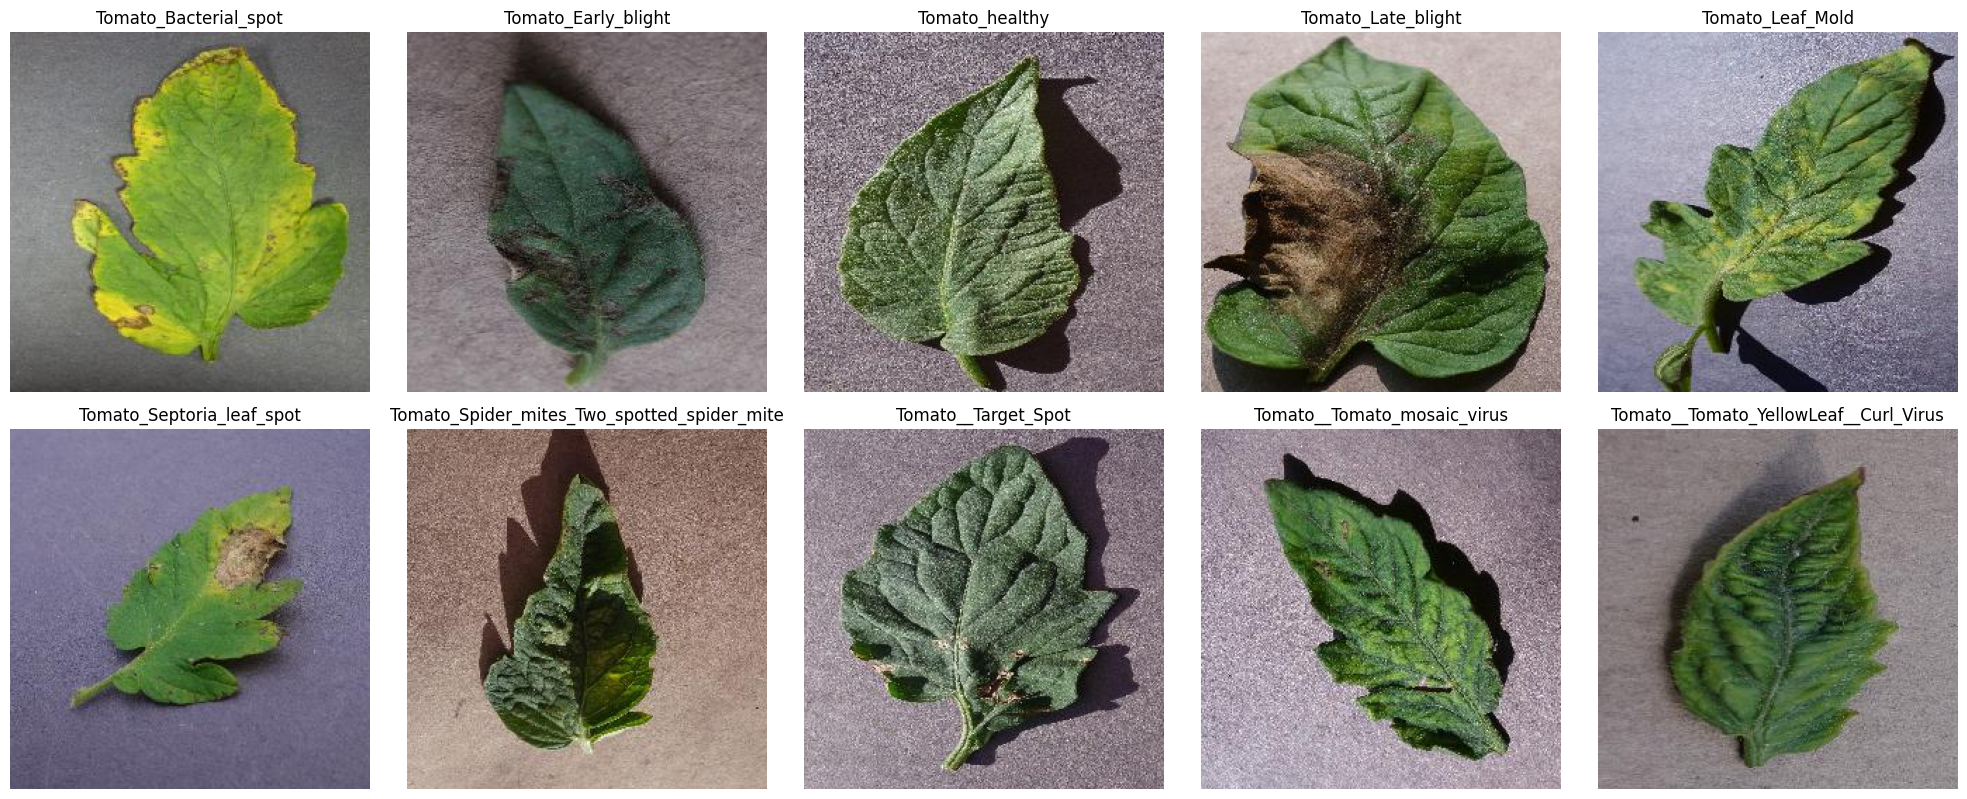

In [7]:
import os
import random
import cv2
import matplotlib.pyplot as plt

class_dirs = [d for d in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, d))]

selected_images = []
class_names = []

for class_dir in class_dirs:
    class_path = os.path.join(folder_path, class_dir)
    image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))]
    
    if image_files:
        random_image = random.choice(image_files)
        selected_images.append(os.path.join(class_path, random_image))
        class_names.append(class_dir)
    else:
        print(f"No images found in class directory: {class_dir}")

plt.figure(figsize=(20, 20))
for idx, (image_path, class_name) in enumerate(zip(selected_images, class_names)):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    plt.subplot(5, 5, idx+1) 
    plt.imshow(image)
    plt.title(class_name)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [6]:
import tensorflow as tf

BATCH_SIZE = 32
IMAGE_SIZE = 256

folder_path = r'C:\Users\Renee\Documents\TomatoDisease'

#count total files
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    folder_path,
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 16011 files belonging to 10 classes.


In [7]:
for images, labels in dataset.take(1):
    print(images.shape)

(32, 256, 256, 3)


Data Preprocessing

In [24]:
import os
import shutil

# Directories
dataset_dir = 'TomatoDisease/'
cleaned_dir = 'TomatoDiseaseCleaned/'

# Copy the dataset directory to a new location
if not os.path.exists(cleaned_dir):
    shutil.copytree(dataset_dir, cleaned_dir)

Reading images from c:/Users/Renee/OneDrive - Asia Pacific University/Documents/TomatoDiseaseClassification/TomatoDiseaseCleaned
Checking for dark, light, odd_aspect_ratio, low_information, exact_duplicates, near_duplicates, blurry, grayscale, odd_size images ...


  0%|          | 0/16011 [00:00<?, ?it/s]

  0%|          | 0/16011 [00:00<?, ?it/s]

Issue checks completed. 37 issues found in the dataset. To see a detailed report of issues found, use imagelab.report().
Issues found in images in order of severity in the dataset

|    | issue_type       |   num_images |
|---:|:-----------------|-------------:|
|  0 | exact_duplicates |           28 |
|  1 | blurry           |            7 |
|  2 | low_information  |            2 |
|  3 | dark             |            0 |
|  4 | light            |            0 |
|  5 | odd_aspect_ratio |            0 |
|  6 | grayscale        |            0 |
|  7 | odd_size         |            0 |
|  8 | near_duplicates  |            0 | 

----------------- exact_duplicates images ------------------

Number of examples with this issue: 28
Examples representing most severe instances of this issue:

Set: 0


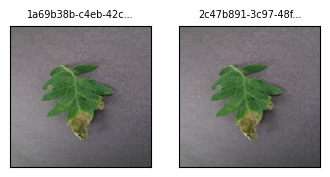

Set: 1


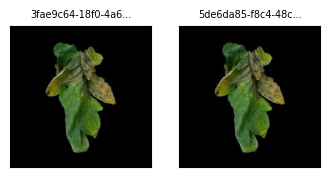

Set: 2


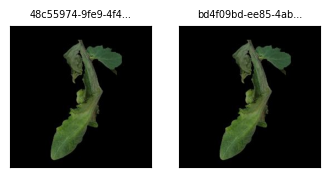

Set: 3


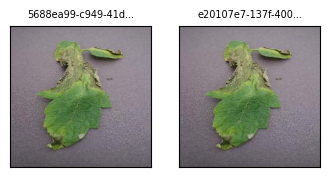

---------------------- blurry images -----------------------

Number of examples with this issue: 7
Examples representing most severe instances of this issue:



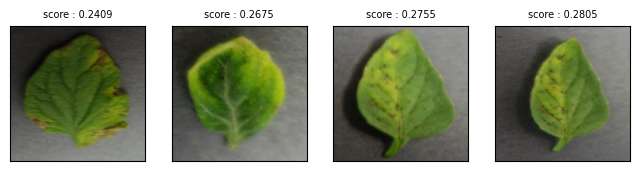

------------------ low_information images ------------------

Number of examples with this issue: 2
Examples representing most severe instances of this issue:



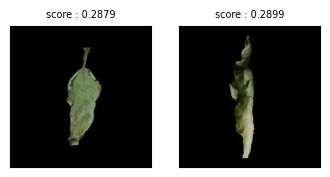

In [25]:
from cleanvision import Imagelab

# Define the folder path
folder_path = 'TomatoDiseaseCleaned/'

# Initialize Imagelab
imagelab = Imagelab(data_path=folder_path)

# Find issues in the images
imagelab.find_issues()

# Generate a report of the issues
imagelab.report()

In [26]:
duplicated_sets= imagelab.info["exact_duplicates"]["sets"]
duplicated_sets

[['c:/Users/Renee/OneDrive - Asia Pacific University/Documents/TomatoDiseaseClassification/TomatoDiseaseCleaned/Tomato_Late_blight/1a69b38b-c4eb-42c4-9584-bcb14fb8db0c___GHLB2 Leaf 9011.JPG',
  'c:/Users/Renee/OneDrive - Asia Pacific University/Documents/TomatoDiseaseClassification/TomatoDiseaseCleaned/Tomato_Late_blight/2c47b891-3c97-48f1-a2cc-5aa53d3a1148___GHLB2 Leaf 9011.JPG'],
 ['c:/Users/Renee/OneDrive - Asia Pacific University/Documents/TomatoDiseaseClassification/TomatoDiseaseCleaned/Tomato_Late_blight/3fae9c64-18f0-4a67-9f97-554248bb1bed___GHLB_PS Leaf 24 Day 16.jpg',
  'c:/Users/Renee/OneDrive - Asia Pacific University/Documents/TomatoDiseaseClassification/TomatoDiseaseCleaned/Tomato_Late_blight/5de6da85-f8c4-48c4-b463-3e6bd78884cc___GHLB_PS Leaf 24 Day 16.jpg'],
 ['c:/Users/Renee/OneDrive - Asia Pacific University/Documents/TomatoDiseaseClassification/TomatoDiseaseCleaned/Tomato_Late_blight/48c55974-9fe9-4f4b-94f7-c8cd127d1e05___GHLB_PS Leaf 23.7 Day 13.jpg',
  'c:/Users/Ren

In [27]:
duplicated_files = [set[0] for set in duplicated_sets]
duplicated_files

['c:/Users/Renee/OneDrive - Asia Pacific University/Documents/TomatoDiseaseClassification/TomatoDiseaseCleaned/Tomato_Late_blight/1a69b38b-c4eb-42c4-9584-bcb14fb8db0c___GHLB2 Leaf 9011.JPG',
 'c:/Users/Renee/OneDrive - Asia Pacific University/Documents/TomatoDiseaseClassification/TomatoDiseaseCleaned/Tomato_Late_blight/3fae9c64-18f0-4a67-9f97-554248bb1bed___GHLB_PS Leaf 24 Day 16.jpg',
 'c:/Users/Renee/OneDrive - Asia Pacific University/Documents/TomatoDiseaseClassification/TomatoDiseaseCleaned/Tomato_Late_blight/48c55974-9fe9-4f4b-94f7-c8cd127d1e05___GHLB_PS Leaf 23.7 Day 13.jpg',
 'c:/Users/Renee/OneDrive - Asia Pacific University/Documents/TomatoDiseaseClassification/TomatoDiseaseCleaned/Tomato_Late_blight/5688ea99-c949-41d0-bbab-9cbf0ffb8bcd___GHLB2 Leaf 8677.JPG',
 'c:/Users/Renee/OneDrive - Asia Pacific University/Documents/TomatoDiseaseClassification/TomatoDiseaseCleaned/Tomato_Late_blight/5f21282c-e2ef-4c4a-ace1-b5701fe7effc___GHLB2 Leaf 8999.JPG',
 'c:/Users/Renee/OneDrive - A

In [28]:
blurry_images = imagelab.issues[imagelab.issues["is_blurry_issue"] == True].sort_values(by=["blurry_score"])
blurry_image_files = blurry_images.index.tolist()
blurry_image_files

['c:/Users/Renee/OneDrive - Asia Pacific University/Documents/TomatoDiseaseClassification/TomatoDiseaseCleaned/Tomato__Tomato_YellowLeaf__Curl_Virus/6c0da973-414f-473f-8cb4-f280b39abb74___UF.GRC_YLCV_Lab 08524.JPG',
 'c:/Users/Renee/OneDrive - Asia Pacific University/Documents/TomatoDiseaseClassification/TomatoDiseaseCleaned/Tomato__Tomato_YellowLeaf__Curl_Virus/02cb40d6-550a-42fb-99ce-247e4406a322___UF.GRC_YLCV_Lab 02991.JPG',
 'c:/Users/Renee/OneDrive - Asia Pacific University/Documents/TomatoDiseaseClassification/TomatoDiseaseCleaned/Tomato__Tomato_YellowLeaf__Curl_Virus/6f407e70-a20b-4efa-a156-13dd33eaf0ec___UF.GRC_YLCV_Lab 08427.JPG',
 'c:/Users/Renee/OneDrive - Asia Pacific University/Documents/TomatoDiseaseClassification/TomatoDiseaseCleaned/Tomato__Tomato_YellowLeaf__Curl_Virus/63476e74-7aae-4e1c-b550-89e4be34149f___UF.GRC_YLCV_Lab 08428.JPG',
 'c:/Users/Renee/OneDrive - Asia Pacific University/Documents/TomatoDiseaseClassification/TomatoDiseaseCleaned/Tomato_Bacterial_spot/ad6

In [29]:
low_information = imagelab.issues[imagelab.issues["is_low_information_issue"] == True]
low_information_files = low_information.index.tolist()
low_information_files

['c:/Users/Renee/OneDrive - Asia Pacific University/Documents/TomatoDiseaseClassification/TomatoDiseaseCleaned/Tomato_Late_blight/7b343a4c-5fbc-40f6-83da-ccae49ebd5fb___GHLB_PS Leaf 35 Day 13.jpg',
 'c:/Users/Renee/OneDrive - Asia Pacific University/Documents/TomatoDiseaseClassification/TomatoDiseaseCleaned/Tomato_Late_blight/ed974f5b-e999-46a9-9e22-da51da2766b6___GHLB_PS Leaf 8 Day 16.jpg']

In [30]:
files_to_remove = low_information_files+blurry_image_files+duplicated_files
files_to_remove

['c:/Users/Renee/OneDrive - Asia Pacific University/Documents/TomatoDiseaseClassification/TomatoDiseaseCleaned/Tomato_Late_blight/7b343a4c-5fbc-40f6-83da-ccae49ebd5fb___GHLB_PS Leaf 35 Day 13.jpg',
 'c:/Users/Renee/OneDrive - Asia Pacific University/Documents/TomatoDiseaseClassification/TomatoDiseaseCleaned/Tomato_Late_blight/ed974f5b-e999-46a9-9e22-da51da2766b6___GHLB_PS Leaf 8 Day 16.jpg',
 'c:/Users/Renee/OneDrive - Asia Pacific University/Documents/TomatoDiseaseClassification/TomatoDiseaseCleaned/Tomato__Tomato_YellowLeaf__Curl_Virus/6c0da973-414f-473f-8cb4-f280b39abb74___UF.GRC_YLCV_Lab 08524.JPG',
 'c:/Users/Renee/OneDrive - Asia Pacific University/Documents/TomatoDiseaseClassification/TomatoDiseaseCleaned/Tomato__Tomato_YellowLeaf__Curl_Virus/02cb40d6-550a-42fb-99ce-247e4406a322___UF.GRC_YLCV_Lab 02991.JPG',
 'c:/Users/Renee/OneDrive - Asia Pacific University/Documents/TomatoDiseaseClassification/TomatoDiseaseCleaned/Tomato__Tomato_YellowLeaf__Curl_Virus/6f407e70-a20b-4efa-a156-

In [31]:
import os

# Remove the files in the cleaned directory
for file_path in files_to_remove:
    cleaned_file_path = os.path.join(cleaned_dir, file_path)
    if os.path.exists(cleaned_file_path):
        os.remove(cleaned_file_path)
        print(f"Removed: {cleaned_file_path}")
    else:
        print(f"File not found: {cleaned_file_path}")

print("Cleaning complete.")


Removed: c:/Users/Renee/OneDrive - Asia Pacific University/Documents/TomatoDiseaseClassification/TomatoDiseaseCleaned/Tomato_Late_blight/7b343a4c-5fbc-40f6-83da-ccae49ebd5fb___GHLB_PS Leaf 35 Day 13.jpg
Removed: c:/Users/Renee/OneDrive - Asia Pacific University/Documents/TomatoDiseaseClassification/TomatoDiseaseCleaned/Tomato_Late_blight/ed974f5b-e999-46a9-9e22-da51da2766b6___GHLB_PS Leaf 8 Day 16.jpg
Removed: c:/Users/Renee/OneDrive - Asia Pacific University/Documents/TomatoDiseaseClassification/TomatoDiseaseCleaned/Tomato__Tomato_YellowLeaf__Curl_Virus/6c0da973-414f-473f-8cb4-f280b39abb74___UF.GRC_YLCV_Lab 08524.JPG
Removed: c:/Users/Renee/OneDrive - Asia Pacific University/Documents/TomatoDiseaseClassification/TomatoDiseaseCleaned/Tomato__Tomato_YellowLeaf__Curl_Virus/02cb40d6-550a-42fb-99ce-247e4406a322___UF.GRC_YLCV_Lab 02991.JPG
Removed: c:/Users/Renee/OneDrive - Asia Pacific University/Documents/TomatoDiseaseClassification/TomatoDiseaseCleaned/Tomato__Tomato_YellowLeaf__Curl_Vir

In [32]:
# No of Files After Cleaning

import os
import pandas as pd

class_counts = {}

cleaned_dir = 'TomatoDiseaseCleaned/'

for root, dirs, files in os.walk(cleaned_dir):
    if root == cleaned_dir:
        total_classes = len(dirs)
        class_names = dirs
        class_counts = {class_name: 0 for class_name in class_names}
    else:
        class_name = os.path.basename(root)
        num_files = len(files)
        class_counts[class_name] = num_files
        total_images += num_files

# Convert the class counts dictionary to a pandas DataFrame
df_class_counts = pd.DataFrame(list(class_counts.items()), columns=['Class Name', 'No of Files'])

# Print the DataFrame as a formatted table
print(df_class_counts.to_string(index=False))

                                 Class Name  No of Files
                      Tomato_Bacterial_spot         2126
                        Tomato_Early_blight         1000
                             Tomato_healthy         1585
                         Tomato_Late_blight         1899
                           Tomato_Leaf_Mold          952
                  Tomato_Septoria_leaf_spot         1771
Tomato_Spider_mites_Two_spotted_spider_mite         1676
                        Tomato__Target_Spot         1404
                Tomato__Tomato_mosaic_virus          373
      Tomato__Tomato_YellowLeaf__Curl_Virus         3203


In [1]:
import splitfolders
import os

# Define the directory with the dataset
dataset_dir = 'TomatoDiseaseCleaned/'

# Create output directory
output_dir = 'TomatoDiseaseCleanedSplit/'

# Create the output directory if it does not exist
os.makedirs(output_dir, exist_ok=True)

# Split with a ratio
splitfolders.ratio(dataset_dir, output=output_dir, seed=1337, ratio=(.8, .1, .1))

Copying files: 15989 files [00:54, 295.20 files/s]


In [34]:
# No of File in Train Directory

import os
import pandas as pd

train_dir = 'TomatoDiseaseSplit/train'
class_names = os.listdir(train_dir)

class_counts = {class_name: 0 for class_name in class_names}

for class_name in class_names:
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path):
        file_count = len(os.listdir(class_path))
        class_counts[class_name] = file_count
df_class_counts = pd.DataFrame(list(class_counts.items()), columns=['Class Name', 'No of Files'])

print(df_class_counts.to_string(index=False))

                                 Class Name  No of Files
                      Tomato_Bacterial_spot         1700
                        Tomato_Early_blight          800
                             Tomato_healthy         1268
                         Tomato_Late_blight         1519
                           Tomato_Leaf_Mold          761
                  Tomato_Septoria_leaf_spot         1416
Tomato_Spider_mites_Two_spotted_spider_mite         1340
                        Tomato__Target_Spot         1123
                Tomato__Tomato_mosaic_virus          298
      Tomato__Tomato_YellowLeaf__Curl_Virus         2562


In [35]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import numpy as np
import random
import shutil
import pandas as pd

# Set threshold
threshold = 1000

# Data augmentation settings
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Initialize class counts dictionary
class_counts = {}

# Loop through each class directory
for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    
    if os.path.isdir(class_path):
        # Count the number of images in the class
        image_files = os.listdir(class_path)
        file_count = len(image_files)
        
        if file_count < threshold:
            # Oversampling - Data augmentation
            images_needed = threshold - file_count
            augmented_count = 0
            
            print(f"Oversampling class '{class_name}' (currently {file_count} images, need {images_needed} more)")
            
            while augmented_count < images_needed:
                # Randomly select an image to augment
                image_file = random.choice(image_files)
                image_path = os.path.join(class_path, image_file)
                
                # Load and augment the image
                img = load_img(image_path)
                x = img_to_array(img)
                x = x.reshape((1,) + x.shape)
                
                for batch in datagen.flow(x, batch_size=1, save_to_dir=class_path, save_prefix='aug', save_format='jpeg'):
                    augmented_count += 1
                    if augmented_count >= images_needed:
                        break

        elif file_count > threshold:
            # Undersampling - Randomly remove excess images
            images_to_remove = file_count - threshold
            image_files_to_remove = random.sample(image_files, images_to_remove)
            
            print(f"Undersampling class '{class_name}' (currently {file_count} images, removing {images_to_remove})")
            
            for image_file in image_files_to_remove:
                image_path = os.path.join(class_path, image_file)
                os.remove(image_path)

# Show the number of images in each class after balancing
class_counts = {class_name: len(os.listdir(os.path.join(train_dir, class_name))) for class_name in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, class_name))}

# Convert the class counts to a DataFrame for easier viewing
df_class_counts = pd.DataFrame(list(class_counts.items()), columns=['Class Name', 'No of Files'])
print("Number of Files for Each Class After Data Balancing:")
print(df_class_counts.to_string(index=False))

Undersampling class 'Tomato_Bacterial_spot' (currently 1700 images, removing 700)
Oversampling class 'Tomato_Early_blight' (currently 800 images, need 200 more)
Undersampling class 'Tomato_healthy' (currently 1268 images, removing 268)
Undersampling class 'Tomato_Late_blight' (currently 1519 images, removing 519)
Oversampling class 'Tomato_Leaf_Mold' (currently 761 images, need 239 more)
Undersampling class 'Tomato_Septoria_leaf_spot' (currently 1416 images, removing 416)
Undersampling class 'Tomato_Spider_mites_Two_spotted_spider_mite' (currently 1340 images, removing 340)
Undersampling class 'Tomato__Target_Spot' (currently 1123 images, removing 123)
Oversampling class 'Tomato__Tomato_mosaic_virus' (currently 298 images, need 702 more)
Undersampling class 'Tomato__Tomato_YellowLeaf__Curl_Virus' (currently 2562 images, removing 1562)
Number of Files for Each Class After Data Balancing:
                                 Class Name  No of Files
                      Tomato_Bacterial_spot

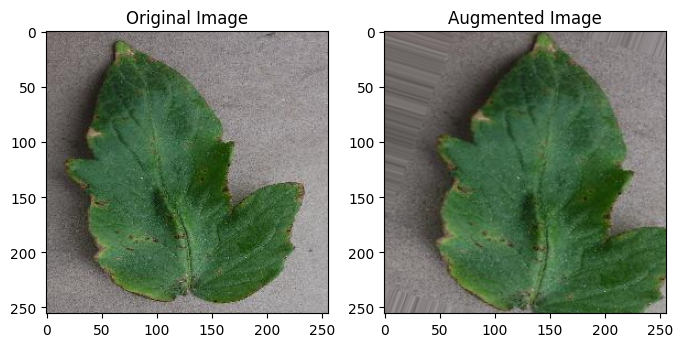

In [36]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import numpy as np
import matplotlib.pyplot as plt

sample_class_dir = os.path.join(train_dir, os.listdir(train_dir)[0])  # Use the first class for the sample

# Load a sample image
sample_image_path = os.path.join(sample_class_dir, os.listdir(sample_class_dir)[0])
sample_image = load_img(sample_image_path)

# Convert the image to array
x = img_to_array(sample_image)
x = x.reshape((1,) + x.shape)  # Reshape for the ImageDataGenerator

# Create an ImageDataGenerator object for data augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Generate one augmented image
augmented_image = next(datagen.flow(x, batch_size=1))[0].astype('uint8')

# Plot the original and augmented images
plt.figure(figsize=(8, 4))

# Original image
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(sample_image)

# Augmented image
plt.subplot(1, 2, 2)
plt.title('Augmented Image')
plt.imshow(augmented_image)

plt.show()

Model Building

In [37]:
# Load Dataset
import tensorflow as tf

# Set path to your dataset
train_dir = 'TomatoDiseaseSplit/train'
val_dir = 'TomatoDiseaseSplit/val'
test_dir = 'TomatoDiseaseSplit/test'

# Define parameters
BATCH_SIZE = 32
IMG_SIZE = (256, 256)  # Image dimensions
AUTOTUNE = tf.data.experimental.AUTOTUNE

# Load the train dataset
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                    shuffle=True,
                                                                    batch_size=BATCH_SIZE,
                                                                    image_size=IMG_SIZE)

# Load the validation dataset
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(val_dir,
                                                                  shuffle=True,
                                                                  batch_size=BATCH_SIZE,
                                                                  image_size=IMG_SIZE)

# Load the test dataset
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                   shuffle=False,
                                                                   batch_size=BATCH_SIZE,
                                                                   image_size=IMG_SIZE)

# Cache and prefetch data for performance
train_dataset = train_dataset.cache().prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.cache().prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(buffer_size=AUTOTUNE)

Found 9973 files belonging to 10 classes.
Found 1595 files belonging to 10 classes.
Found 1607 files belonging to 10 classes.


In [1]:
import os

# Directories for training, validation, and test sets
train_dir = 'TomatoDiseaseSplit/train'
val_dir = 'TomatoDiseaseSplit/val'
test_dir = 'TomatoDiseaseSplit/test'

# Function to rename files in a directory, replacing spaces with underscores
def rename_files(directory):
    for class_dir in os.listdir(directory):
        class_path = os.path.join(directory, class_dir)
        if os.path.isdir(class_path):
            for filename in os.listdir(class_path):
                if ' ' in filename:  # Check if the filename contains spaces
                    new_name = filename.replace(' ', '_')  # Replace spaces with underscores
                    # Full paths
                    src = os.path.join(class_path, filename)
                    dst = os.path.join(class_path, new_name)
                    # Rename the file
                    os.rename(src, dst)
                    print(f"Renamed: {src} to {dst}")

# Rename files in train, val, and test directories
rename_files(train_dir)
rename_files(val_dir)
rename_files(test_dir)

Renamed: TomatoDiseaseSplit/train\Tomato_Bacterial_spot\0045ba29-ed1b-43b4-afde-719cc7adefdb___GCREC_Bact.Sp 6254.JPG to TomatoDiseaseSplit/train\Tomato_Bacterial_spot\0045ba29-ed1b-43b4-afde-719cc7adefdb___GCREC_Bact.Sp_6254.JPG
Renamed: TomatoDiseaseSplit/train\Tomato_Bacterial_spot\00639d29-2d1a-4fcf-9bd3-a2b3109c74c4___UF.GRC_BS_Lab Leaf 1054.JPG to TomatoDiseaseSplit/train\Tomato_Bacterial_spot\00639d29-2d1a-4fcf-9bd3-a2b3109c74c4___UF.GRC_BS_Lab_Leaf_1054.JPG
Renamed: TomatoDiseaseSplit/train\Tomato_Bacterial_spot\00728f4d-83a0-49f1-87f8-374646fcda05___GCREC_Bact.Sp 6326.JPG to TomatoDiseaseSplit/train\Tomato_Bacterial_spot\00728f4d-83a0-49f1-87f8-374646fcda05___GCREC_Bact.Sp_6326.JPG
Renamed: TomatoDiseaseSplit/train\Tomato_Bacterial_spot\00a7c269-3476-4d25-b744-44d6353cd921___GCREC_Bact.Sp 5807.JPG to TomatoDiseaseSplit/train\Tomato_Bacterial_spot\00a7c269-3476-4d25-b744-44d6353cd921___GCREC_Bact.Sp_5807.JPG
Renamed: TomatoDiseaseSplit/train\Tomato_Bacterial_spot\01375198-62af-

CNN Model

In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN model
def build_tomato_disease_cnn(input_shape, num_classes):
    model = tf.keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),

        layers.Conv2D(256, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),

        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Input shape for 256x256 RGB images
input_shape = (256, 256, 3)
num_classes = 10  #  10 classes for the tomato diseases

# Build the model
custom_cnn_model = build_tomato_disease_cnn(input_shape, num_classes)

# Compile the model
custom_cnn_model.compile(optimizer='adam',
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])

c:\Users\Renee\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# Train the model
history = custom_cnn_model.fit(train_dataset,
                               validation_data=val_dataset,
                               epochs=30)  

Epoch 1/30
407/407 ━━━━━━━━━━━━━━━━━━━━ 1046s 3s/step - accuracy: 0.4053 - loss: 8.7750 - val_accuracy: 0.6182 - val_loss: 1.2052
Epoch 2/30
407/407 ━━━━━━━━━━━━━━━━━━━━ 1174s 3s/step - accuracy: 0.5319 - loss: 1.5157 - val_accuracy: 0.4658 - val_loss: 1.9756
Epoch 3/30
407/407 ━━━━━━━━━━━━━━━━━━━━ 1164s 3s/step - accuracy: 0.6065 - loss: 1.2322 - val_accuracy: 0.6489 - val_loss: 1.3184
Epoch 4/30
407/407 ━━━━━━━━━━━━━━━━━━━━ 1110s 3s/step - accuracy: 0.6450 - loss: 1.1023 - val_accuracy: 0.5693 - val_loss: 2.1435
Epoch 5/30
407/407 ━━━━━━━━━━━━━━━━━━━━ 1131s 3s/step - accuracy: 0.6862 - loss: 0.9667 - val_accuracy: 0.7348 - val_loss: 0.9614
Epoch 6/30
407/407 ━━━━━━━━━━━━━━━━━━━━ 752s 2s/step - accuracy: 0.7056 - loss: 0.9819 - val_accuracy: 0.7580 - val_loss: 0.8736
Epoch 7/30
407/407 ━━━━━━━━━━━━━━━━━━━━ 816s 2s/step - accuracy: 0.7389 - loss: 0.8095 - val_accuracy: 0.4357 - val_loss: 5.0738
Epoch 8/30
352/407 ━━━━━━━━━━━━━━━━━━━━ 2:09 2s/step - accuracy: 0.7620 - loss: 0.7358

KeyboardInterrupt: 

In [ ]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = custom_cnn_model.evaluate(test_dataset)
print(f'Test accuracy: {test_accuracy}')

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Get the true labels from the test dataset
y_true = np.concatenate([y for x, y in test_dataset], axis=0)

# Get the predicted labels
y_pred = tomato_cnn_model.predict(test_dataset)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate and print the classification report
class_names = test_dataset.class_names
report = classification_report(y_true, y_pred_classes, target_names=class_names)

print(report)

ResNet-18

In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models


def residual_block(x, filters, kernel_size=3, stride=1):
    shortcut = x
    x = layers.Conv2D(filters, kernel_size=kernel_size, strides=stride, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Conv2D(filters, kernel_size=kernel_size, strides=1, padding='same')(x)
    x = layers.BatchNormalization()(x)
    
    if stride != 1:
        shortcut = layers.Conv2D(filters, kernel_size=1, strides=stride, padding='same')(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)
    
    x = layers.add([x, shortcut])
    x = layers.ReLU()(x)
    return x

def build_resnet18(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, kernel_size=7, strides=2, padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling2D(pool_size=3, strides=2, padding='same')(x)
    
    x = residual_block(x, 64)
    x = residual_block(x, 64)
    x = residual_block(x, 128, stride=2)
    x = residual_block(x, 128)
    x = residual_block(x, 256, stride=2)
    x = residual_block(x, 256)
    x = residual_block(x, 512, stride=2)
    x = residual_block(x, 512)
    
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)
    
    model = models.Model(inputs, x)
    return model

input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3)
num_classes = len(training_dataset.class_names)

resnet_model = build_resnet18(input_shape, num_classes)

In [15]:
resnet_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = resnet_model.fit(training_dataset, epochs=10)


Epoch 1/50
  6/407 ━━━━━━━━━━━━━━━━━━━━ 11:49 2s/step - accuracy: 0.1579 - loss: 3.3235

KeyboardInterrupt: 

In [6]:
# Assuming you have a validation dataset
validation_dir = 'TomatoDiseaseSplit/val'


validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    validation_dir,
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE)

loss, accuracy = model.evaluate(validation_dataset)
print(f'Validation accuracy: {accuracy}')


Found 1595 files belonging to 10 classes.
50/50 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.7736 - loss: 0.7108
Validation accuracy: 0.7855799198150635
